### ライブラリのインポート

In [30]:
import analyzer as an
import pandas as pd
import importlib
importlib.reload(an)
text = """
名称、カテゴリー、アドレス、アクセス
路線、駅、バス停、
乗換時間、バス、徒歩、車、合計時間（分）
築年数、構造、階数、
家賃、管理費、敷金、礼金（万円）
間取り、面積、URL
"""


### データの読み込み

In [31]:
df = pd.read_csv("./data/yokohama_kawasaki.csv", index_col=0, encoding="utf-8")


### データの確認

In [32]:
df.head(3)


,名称,カテゴリー,アドレス,アクセス,路線,駅,バス停,乗換時間,バス,徒歩,...,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL
0,ライトマルシェ,賃貸アパート,神奈川県横浜市鶴見区市場東中町,ＪＲ南武線/八丁畷駅 歩10分,ＪＲ南武線,八丁畷駅,NaN,27,0,10,...,14,3,1,6.0,0.0,6.0,6.0,ワンルーム,11.00,https://suumo.jp/chintai/jnc_000013653014/?bc=...
1,ライトマルシェ,賃貸アパート,神奈川県横浜市鶴見区市場東中町,京急本線/鶴見市場駅 歩1分,京急本線,鶴見市場駅,NaN,26,0,1,...,14,3,2,6.0,0.0,6.0,6.0,ワンルーム,11.56,https://suumo.jp/chintai/jnc_000013653015/?bc=...
2,ツインハウスフルヤ,賃貸マンション,神奈川県横浜市鶴見区潮田町２,ＪＲ京浜東北線/鶴見駅 歩15分,ＪＲ京浜東北線,鶴見駅,NaN,20,0,15,...,31,5,4,7.5,1.0,0.0,7.5,1LDK,38.88,https://suumo.jp/chintai/jnc_000013653182/?bc=...


### グラフ化

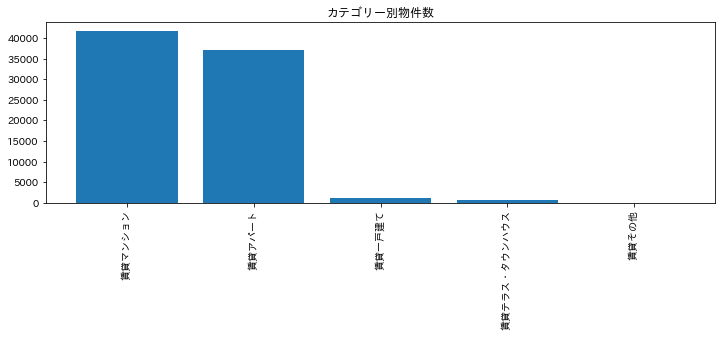

In [33]:
an.n_rooms(df, "カテゴリー")


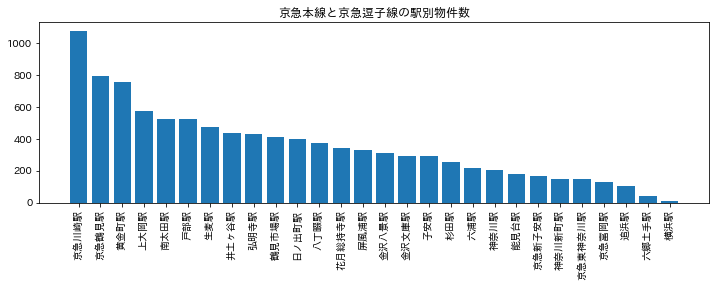

In [34]:
an.n_rooms_by_line(df, ["京急本線", "京急逗子線"], "駅")


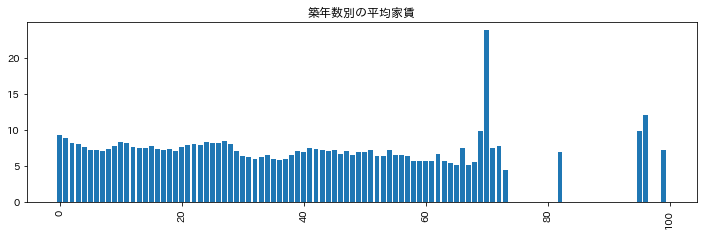

In [35]:
an.ranking_bar(df, "築年数", "家賃")


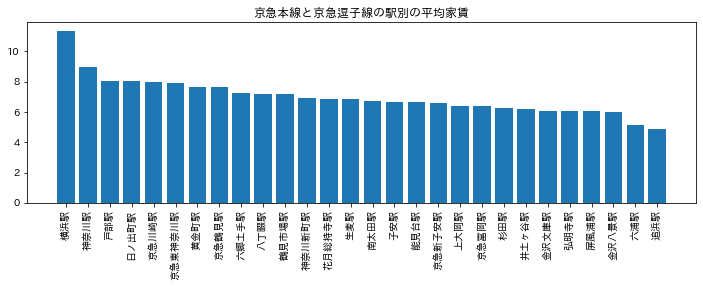

In [36]:
an.ranking_bar_by_line(df, ["京急本線", "京急逗子線"], "駅", "家賃")


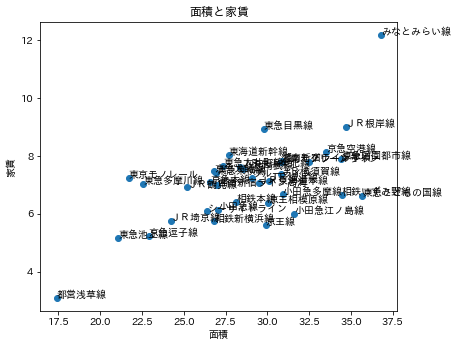

In [37]:
an.scatter_line(df, "面積", "家賃")


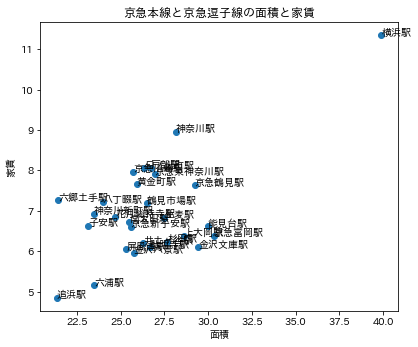

In [38]:
an.scatter_station(df, ["京急本線", "京急逗子線"], "面積", "家賃")


### データの抽出

In [39]:
# 家賃の列の抽出
df["家賃"]


0         6.0
1         6.0
2         7.5
3         7.5
4         3.0
         ... 
80594     7.9
80595    11.5
80596     6.1
80597     6.1
80598     6.1
Name: 家賃, Length: 80599, dtype: float64

In [45]:
# 家賃の列のindex=2の行の抽出
df["家賃"][2]


7.5

In [46]:
# 0列目の2行目の抽出
df.iloc[0, 2]


'神奈川県横浜市鶴見区市場東中町'

In [48]:
# 家賃の値が10未満のデータの抽出
df[df["家賃"] < 10]


,名称,カテゴリー,アドレス,アクセス,路線,駅,バス停,乗換時間,バス,徒歩,...,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL
0,ライトマルシェ,賃貸アパート,神奈川県横浜市鶴見区市場東中町,ＪＲ南武線/八丁畷駅 歩10分,ＪＲ南武線,八丁畷駅,NaN,27,0,10,...,14,3,1,6.0,0.0,6.0,6.0,ワンルーム,11.00,https://suumo.jp/chintai/jnc_000013653014/?bc=...
1,ライトマルシェ,賃貸アパート,神奈川県横浜市鶴見区市場東中町,京急本線/鶴見市場駅 歩1分,京急本線,鶴見市場駅,NaN,26,0,1,...,14,3,2,6.0,0.0,6.0,6.0,ワンルーム,11.56,https://suumo.jp/chintai/jnc_000013653015/?bc=...
2,ツインハウスフルヤ,賃貸マンション,神奈川県横浜市鶴見区潮田町２,ＪＲ京浜東北線/鶴見駅 歩15分,ＪＲ京浜東北線,鶴見駅,NaN,20,0,15,...,31,5,4,7.5,1.0,0.0,7.5,1LDK,38.88,https://suumo.jp/chintai/jnc_000013653182/?bc=...
3,ＪＲ京浜東北線 鶴見駅 地下1地上5階建 築31年,賃貸マンション,神奈川県横浜市鶴見区潮田町２,ＪＲ鶴見線/鶴見小野駅 歩13分,ＪＲ鶴見線,鶴見小野駅,NaN,32,0,13,...,31,5,4,7.5,1.0,0.0,7.5,1LDK,38.88,https://suumo.jp/chintai/jnc_000013653183/?bc=...
4,清美荘,賃貸アパート,神奈川県横浜市鶴見区江ケ崎町,ＪＲ南武線/矢向駅 歩12分,ＪＲ南武線,矢向駅,NaN,29,0,12,...,59,2,1,3.0,0.0,0.0,0.0,1K,22.10,https://suumo.jp/chintai/jnc_000013653254/?bc=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80593,アイザック,賃貸アパート,神奈川県川崎市幸区戸手２,ＪＲ東海道本線/川崎駅 歩20分,ＪＲ東海道本線,川崎駅,NaN,20,0,20,...,18,2,1,5.8,0.5,0.0,0.0,1K,18.15,https://suumo.jp/chintai/jnc_000077813396/?bc=...
80594,Ｃａｓａ Ｆ 南幸,賃貸マンション,神奈川県川崎市幸区南幸町３,ＪＲ南武線/矢向駅 歩15分,ＪＲ南武線,矢向駅,NaN,29,0,15,...,5,5,2,7.9,0.6,7.9,7.9,1K,24.29,https://suumo.jp/chintai/jnc_000077813401/?bc=...
80596,サニーハウス,賃貸アパート,神奈川県川崎市多摩区登戸,小田急線/登戸駅 歩12分,小田急線,登戸駅,NaN,47,0,12,...,23,2,1,6.1,0.2,6.1,0.0,1K,27.00,https://suumo.jp/chintai/jnc_000077813458/?bc=...
80597,サニーハウス,賃貸アパート,神奈川県川崎市多摩区登戸,小田急線/向ヶ丘遊園駅 歩12分,小田急線,向ヶ丘遊園駅,NaN,55,0,12,...,23,2,1,6.1,0.2,6.1,0.0,1K,27.00,https://suumo.jp/chintai/jnc_000077813459/?bc=...
